In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import cvs file to pandas data frame
train_db = pd.read_csv('./train.csv')

In [3]:
#drop unnecessary columns
train_db = train_db.drop(columns=['Expiry_date'])
train_db

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,6978.00,1,8849.0
...,...,...,...,...,...,...,...
1394,img_4637237.jpg,DA,52300.0,1307.5,13153.00,1,4565.0
1395,img_4637000.jpg,BQ,41500.0,1037.5,10453.00,1,3363.0
1396,img_4637503.jpg,AA,31400.0,785.0,7928.00,1,5336.0
1397,img_4515101.jpg,A,33200.0,830.0,8378.00,1,8734.0


In [4]:
d = dict()
for i in train_db['Insurance_company']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

In [5]:
d

{'BQ': 131,
 'A': 132,
 'AC': 119,
 'BC': 121,
 'DA': 128,
 'BB': 124,
 'C': 131,
 'O': 126,
 'B': 148,
 'AA': 123,
 'RE': 116}

In [6]:
#fill null values with respective mean or min or max data
train_db['Insurance_company'] = train_db['Insurance_company'].fillna('B')

In [7]:
mean_cost_of_vehicle = train_db['Cost_of_vehicle'].mean()
mean_cost_of_vehicle 

37454.274809160306

In [8]:
train_db['Cost_of_vehicle'].fillna(mean_cost_of_vehicle,inplace=True)

In [9]:
train_db['Cost_of_vehicle']

0       41500.000000
1       50700.000000
2       49500.000000
3       33500.000000
4       27600.000000
            ...     
1394    52300.000000
1395    41500.000000
1396    31400.000000
1397    33200.000000
1398    37454.274809
Name: Cost_of_vehicle, Length: 1399, dtype: float64

In [10]:
min_min_coverage = train_db['Min_coverage'].min()
min_min_coverage

277.5

In [11]:
train_db['Min_coverage'].fillna(min_min_coverage,inplace=True)

In [12]:
max_max_coverage = train_db['Max_coverage'].max()
max_max_coverage

46495.68

In [13]:
train_db['Max_coverage'].fillna(max_max_coverage,inplace=True)

In [14]:
for i in train_db['Condition']:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

In [15]:
d

{'BQ': 131,
 'A': 132,
 'AC': 119,
 'BC': 121,
 'DA': 128,
 'BB': 124,
 'C': 131,
 'O': 126,
 'B': 148,
 'AA': 123,
 'RE': 116,
 0: 99,
 1: 1300}

In [16]:
#drop null values in necessary columns if they are in min range
train_db['Amount'].isnull().sum()

11

In [17]:
#no data in way amount is null and condition is 0
l=[]
for i in range(train_db.shape[0]):
    if np.isnan(train_db.iloc[i]['Amount']) and train_db.iloc[i]['Condition']==0:
        l.append(i)
l

[]

In [18]:
#drop null values of amount since they are very less
train_db.dropna(subset=['Amount'],axis=0,inplace=True)
train_db['Amount'].isnull().sum()

0

In [19]:
train_db.shape

(1388, 7)

In [20]:
#get dummies for categorical column
train_db = pd.get_dummies(train_db,columns=['Insurance_company'])

In [21]:
train_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,img_4513976.jpg,41500.0,1037.5,36142.68,0,0.0,0,0,0,0,0,0,1,0,0,0,0
1,img_7764995.jpg,50700.0,1267.5,12753.00,1,6194.0,0,0,0,0,0,0,1,0,0,0,0
2,img_451308.jpg,49500.0,1237.5,43102.68,0,0.0,1,0,0,0,0,0,0,0,0,0,0
3,img_7768372.jpg,33500.0,837.5,8453.00,1,7699.0,1,0,0,0,0,0,0,0,0,0,0
4,img_7765274.jpg,27600.0,690.0,6978.00,1,8849.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,img_4535755.jpg,51500.0,1287.5,12953.00,1,4058.0,0,0,1,0,0,0,0,0,0,0,0
1394,img_4637237.jpg,52300.0,1307.5,13153.00,1,4565.0,0,0,0,0,0,0,0,0,1,0,0
1395,img_4637000.jpg,41500.0,1037.5,10453.00,1,3363.0,0,0,0,0,0,0,1,0,0,0,0
1396,img_4637503.jpg,31400.0,785.0,7928.00,1,5336.0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
Image_path_data = train_db['Image_path']

In [23]:
train_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,img_4513976.jpg,41500.0,1037.5,36142.68,0,0.0,0,0,0,0,0,0,1,0,0,0,0
1,img_7764995.jpg,50700.0,1267.5,12753.00,1,6194.0,0,0,0,0,0,0,1,0,0,0,0
2,img_451308.jpg,49500.0,1237.5,43102.68,0,0.0,1,0,0,0,0,0,0,0,0,0,0
3,img_7768372.jpg,33500.0,837.5,8453.00,1,7699.0,1,0,0,0,0,0,0,0,0,0,0
4,img_7765274.jpg,27600.0,690.0,6978.00,1,8849.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,img_4535755.jpg,51500.0,1287.5,12953.00,1,4058.0,0,0,1,0,0,0,0,0,0,0,0
1394,img_4637237.jpg,52300.0,1307.5,13153.00,1,4565.0,0,0,0,0,0,0,0,0,1,0,0
1395,img_4637000.jpg,41500.0,1037.5,10453.00,1,3363.0,0,0,0,0,0,0,1,0,0,0,0
1396,img_4637503.jpg,31400.0,785.0,7928.00,1,5336.0,0,1,0,0,0,0,0,0,0,0,0


In [24]:
import os
data =[]
x_train=[]
y_train=[]
IMG_SIZE  = 400

In [25]:
#get_images
Train_images_path = './dataset/trainImages'
for i in train_db.values:
    path = os.path.join(Train_images_path,i[0])
    img= cv2.imread(path)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    data.append([img,i[4]])

In [26]:
import random
random.shuffle(data)

In [131]:

for feature,label in data:
    x_train.append(feature)
    y_train.append(label)
    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [28]:
x_train = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,3)
x_train = x_train/255.
x_train.shape

(1388, 400, 400, 3)

In [132]:
y_train = np.array(y_train)
print(type(x_train),type(y_train))
j=0
for i in y_train:
    if(i==0):
        j+=1
print(j)
        

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
99


In [134]:
#model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=x_train.shape[1:],activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [135]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [136]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,validation_split=0.1,vertical_flip=True,fill_mode='constant',rotation_range=30,rescale=1/255.)

In [116]:
image_generator = datagen.flow(x_train,y_train,batch_size=32,shuffle=True,subset='validation')

In [137]:
history = model.fit(image_generator,epochs=5)

Epoch 1/5
5/5 [==============================] - 11s 2s/step - loss: 0.5764 - accuracy: 0.8841
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 0.7377 - accuracy: 0.9275
Epoch 3/5
5/5 [==============================] - 14s 3s/step - loss: 0.5699 - accuracy: 0.9275
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.5118 - accuracy: 0.9275
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.3002 - accuracy: 0.9275


In [100]:
#history = model.fit(x_train,y_train,validation_split=0.1,batch_size=8,epochs=10)

Epoch 1/10
157/157 [==============================] - 141s 896ms/step - loss: 0.2781 - accuracy: 0.9279 - val_loss: 0.2551 - val_accuracy: 0.9353
Epoch 2/10
157/157 [==============================] - 138s 879ms/step - loss: 0.2510 - accuracy: 0.9279 - val_loss: 0.2081 - val_accuracy: 0.9353
Epoch 3/10
157/157 [==============================] - 137s 873ms/step - loss: 0.2532 - accuracy: 0.9279 - val_loss: 0.2244 - val_accuracy: 0.9496
Epoch 4/10
157/157 [==============================] - 137s 876ms/step - loss: 0.2018 - accuracy: 0.9351 - val_loss: 0.2952 - val_accuracy: 0.9424
Epoch 5/10
157/157 [==============================] - 138s 877ms/step - loss: 0.1974 - accuracy: 0.9536 - val_loss: 0.2881 - val_accuracy: 0.9424
Epoch 6/10
157/157 [==============================] - 151s 964ms/step - loss: 0.1199 - accuracy: 0.9632 - val_loss: 0.3876 - val_accuracy: 0.9496
Epoch 7/10
157/157 [==============================] - 153s 977ms/step - loss: 0.0790 - accuracy: 0.9784 - val_loss: 0.3783 -

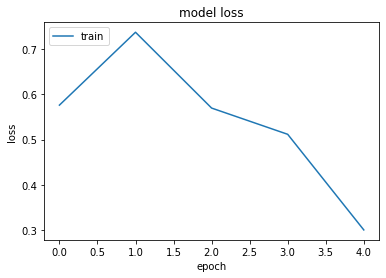

In [138]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

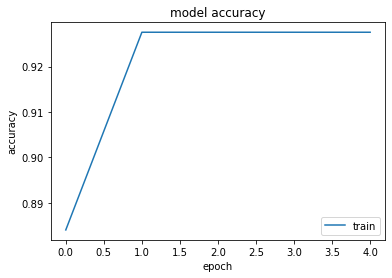

In [139]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [102]:
#so no of epochs is 8(best)
import pickle

In [62]:
train_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,img_4513976.jpg,41500.0,1037.5,36142.68,0,0.0,0,0,0,0,0,0,1,0,0,0,0
1,img_7764995.jpg,50700.0,1267.5,12753.00,1,6194.0,0,0,0,0,0,0,1,0,0,0,0
2,img_451308.jpg,49500.0,1237.5,43102.68,0,0.0,1,0,0,0,0,0,0,0,0,0,0
3,img_7768372.jpg,33500.0,837.5,8453.00,1,7699.0,1,0,0,0,0,0,0,0,0,0,0
4,img_7765274.jpg,27600.0,690.0,6978.00,1,8849.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,img_4535755.jpg,51500.0,1287.5,12953.00,1,4058.0,0,0,1,0,0,0,0,0,0,0,0
1394,img_4637237.jpg,52300.0,1307.5,13153.00,1,4565.0,0,0,0,0,0,0,0,0,1,0,0
1395,img_4637000.jpg,41500.0,1037.5,10453.00,1,3363.0,0,0,0,0,0,0,1,0,0,0,0
1396,img_4637503.jpg,31400.0,785.0,7928.00,1,5336.0,0,1,0,0,0,0,0,0,0,0,0


In [63]:
new_db = train_db[train_db.columns]
c = new_db['Condition']
new_db = new_db.drop(columns=['Condition'])

In [64]:
filter_db = new_db[new_db['Amount']>0] 

In [65]:
filter_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Amount,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
1,img_7764995.jpg,50700.0,1267.5,12753.0,6194.0,0,0,0,0,0,0,1,0,0,0,0
3,img_7768372.jpg,33500.0,837.5,8453.0,7699.0,1,0,0,0,0,0,0,0,0,0,0
4,img_7765274.jpg,27600.0,690.0,6978.0,8849.0,0,0,1,0,0,0,0,0,0,0,0
5,img_4537770.jpg,50700.0,1267.5,12753.0,253.0,0,0,1,0,0,0,0,0,0,0,0
6,img_7765649.jpg,53200.0,1330.0,13378.0,4013.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,img_4535755.jpg,51500.0,1287.5,12953.0,4058.0,0,0,1,0,0,0,0,0,0,0,0
1394,img_4637237.jpg,52300.0,1307.5,13153.0,4565.0,0,0,0,0,0,0,0,0,1,0,0
1395,img_4637000.jpg,41500.0,1037.5,10453.0,3363.0,0,0,0,0,0,0,1,0,0,0,0
1396,img_4637503.jpg,31400.0,785.0,7928.0,5336.0,0,1,0,0,0,0,0,0,0,0,0


In [194]:
regressor_model = RandomForestRegressor(n_estimators=1000,random_state=10)

In [67]:
reg_y = filter_db['Amount']
filter_db = filter_db.drop(columns=['Amount'])

In [72]:
image_paths_train = filter_db['Image_path']
filter_db = filter_db.drop(columns=['Image_path'])
filter_db

,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
1,50700.0,1267.5,12753.0,0,0,0,0,0,0,1,0,0,0,0
3,33500.0,837.5,8453.0,1,0,0,0,0,0,0,0,0,0,0
4,27600.0,690.0,6978.0,0,0,1,0,0,0,0,0,0,0,0
5,50700.0,1267.5,12753.0,0,0,1,0,0,0,0,0,0,0,0
6,53200.0,1330.0,13378.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,51500.0,1287.5,12953.0,0,0,1,0,0,0,0,0,0,0,0
1394,52300.0,1307.5,13153.0,0,0,0,0,0,0,0,0,1,0,0
1395,41500.0,1037.5,10453.0,0,0,0,0,0,0,1,0,0,0,0
1396,31400.0,785.0,7928.0,0,1,0,0,0,0,0,0,0,0,0


In [73]:
reg_y

1       6194.0
3       7699.0
4       8849.0
5        253.0
6       4013.0
         ...  
1393    4058.0
1394    4565.0
1395    3363.0
1396    5336.0
1397    8734.0
Name: Amount, Length: 1288, dtype: float64

In [195]:
regressor_model.fit(filter_db,reg_y)

RandomForestRegressor(n_estimators=1000, random_state=10)

In [196]:
regressor_model.score(filter_db,reg_y)

0.6706267972343887

In [203]:
# new_filter_db = filter_db
# Scaler = sklearn.preprocessing.StandardScaler()
# features = Scaler.fit_transform(new_filter_db)
# model2=tf.keras.Sequential([
#     tf.keras.layers.Dense(128,activation='relu',input_shape=(14,)),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(1),
# ])
# model2.compile(optimizer='adam',loss='sgd',metrics=['accuracy'])
# model2.fit(features,reg_y,epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\util\nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\util\nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\losses.py:1895 get
        return deserialize(identifier)
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\losses.py:1850 deserialize
        return deserialize_keras_object(
    C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:377 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: sgd


In [204]:
>>> from sklearn.linear_model import SGDClassifier
>>> X = [[0., 0.], [1., 1.]]
>>> y = [0, 1]
>>> clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
>>> clf.fit(filter_db,reg_y)

C:\Users\Muni\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5)

In [86]:
test_db = pd.read_csv('./test.csv')

In [87]:
test_db

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.00
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.00
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.00
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.00
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.00
...,...,...,...,...,...,...
595,img_7766518.jpg,B,30900,772.5,2024-10-23,7803.00
596,img_4535713.jpg,O,51300,1282.5,2025-02-21,12903.00
597,img_4511787.jpg,BQ,27000,675.0,2023-07-13,23527.68
598,img_4517592.jpg,AA,42600,1065.0,2024-05-05,10728.00


In [88]:
test_db = test_db.drop(columns=['Expiry_date'])

In [89]:
test_db

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage
0,img_4538519.jpg,B,23600,590.0,5978.00
1,img_7766002.jpg,C,28300,707.5,7153.00
2,img_4637390.jpg,AC,43700,1092.5,11003.00
3,img_4516108.jpg,BB,46100,1152.5,11603.00
4,img_4517008.jpg,BB,40700,1017.5,10253.00
...,...,...,...,...,...
595,img_7766518.jpg,B,30900,772.5,7803.00
596,img_4535713.jpg,O,51300,1282.5,12903.00
597,img_4511787.jpg,BQ,27000,675.0,23527.68
598,img_4517592.jpg,AA,42600,1065.0,10728.00


In [90]:
test_db = pd.get_dummies(test_db,columns=['Insurance_company'])
test_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,img_4538519.jpg,23600,590.0,5978.00,0,0,0,1,0,0,0,0,0,0,0
1,img_7766002.jpg,28300,707.5,7153.00,0,0,0,0,0,0,0,1,0,0,0
2,img_4637390.jpg,43700,1092.5,11003.00,0,0,1,0,0,0,0,0,0,0,0
3,img_4516108.jpg,46100,1152.5,11603.00,0,0,0,0,1,0,0,0,0,0,0
4,img_4517008.jpg,40700,1017.5,10253.00,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,img_7766518.jpg,30900,772.5,7803.00,0,0,0,1,0,0,0,0,0,0,0
596,img_4535713.jpg,51300,1282.5,12903.00,0,0,0,0,0,0,0,0,0,1,0
597,img_4511787.jpg,27000,675.0,23527.68,0,0,0,0,0,0,1,0,0,0,0
598,img_4517592.jpg,42600,1065.0,10728.00,0,1,0,0,0,0,0,0,0,0,0


In [95]:
x_test_condition=[]
y_test_condition=[]
Test_images_path = './dataset/testImages'

In [96]:
for i in test_db.values:
    path = os.path.join(Test_images_path,i[0])
    img= cv2.imread(path)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img/255.
    x_test_condition.append(img)

In [99]:
x_test_condition = np.array(x_test_condition)
x_test_condition.shape

(600, 400, 400, 3)

In [140]:
y_test_condition = model.predict(x_test_condition)

In [121]:
y_test_condition = np.array(y_test_condition)
y_test_condition.shape

(600, 1)

In [145]:
mean = y_test_condition.mean()
mean

0.99642944

In [146]:
final = []
for i in y_test_condition:
    if(i<(mean)):
        final.append(0)
    else:
        final.append(1)

In [149]:
final = np.array(final)

0.5766666666666667

In [150]:
test_db['Condition']=final
test_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition
0,img_4538519.jpg,23600,590.0,5978.00,0,0,0,1,0,0,0,0,0,0,0,1
1,img_7766002.jpg,28300,707.5,7153.00,0,0,0,0,0,0,0,1,0,0,0,0
2,img_4637390.jpg,43700,1092.5,11003.00,0,0,1,0,0,0,0,0,0,0,0,0
3,img_4516108.jpg,46100,1152.5,11603.00,0,0,0,0,1,0,0,0,0,0,0,1
4,img_4517008.jpg,40700,1017.5,10253.00,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,img_7766518.jpg,30900,772.5,7803.00,0,0,0,1,0,0,0,0,0,0,0,1
596,img_4535713.jpg,51300,1282.5,12903.00,0,0,0,0,0,0,0,0,0,1,0,1
597,img_4511787.jpg,27000,675.0,23527.68,0,0,0,0,0,0,1,0,0,0,0,1
598,img_4517592.jpg,42600,1065.0,10728.00,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
test_db['Amount']=0.0
test_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,img_4538519.jpg,23600,590.0,5978.00,0,0,0,1,0,0,0,0,0,0,0,1,0.0
1,img_7766002.jpg,28300,707.5,7153.00,0,0,0,0,0,0,0,1,0,0,0,0,0.0
2,img_4637390.jpg,43700,1092.5,11003.00,0,0,1,0,0,0,0,0,0,0,0,0,0.0
3,img_4516108.jpg,46100,1152.5,11603.00,0,0,0,0,1,0,0,0,0,0,0,1,0.0
4,img_4517008.jpg,40700,1017.5,10253.00,0,0,0,0,1,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,img_7766518.jpg,30900,772.5,7803.00,0,0,0,1,0,0,0,0,0,0,0,1,0.0
596,img_4535713.jpg,51300,1282.5,12903.00,0,0,0,0,0,0,0,0,0,1,0,1,0.0
597,img_4511787.jpg,27000,675.0,23527.68,0,0,0,0,0,0,1,0,0,0,0,1,0.0
598,img_4517592.jpg,42600,1065.0,10728.00,0,1,0,0,0,0,0,0,0,0,0,0,0.0


In [207]:
new_db = test_db[test_db['Condition']==1]


In [208]:
new_2=new_db.drop(columns=['Image_path','Condition','Amount'])

In [209]:
new_2

,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,23600,590.0,5978.00,0,0,0,1,0,0,0,0,0,0,0
3,46100,1152.5,11603.00,0,0,0,0,1,0,0,0,0,0,0
4,40700,1017.5,10253.00,0,0,0,0,1,0,0,0,0,0,0
5,30500,762.5,7703.00,0,0,0,0,1,0,0,0,0,0,0
6,41400,1035.0,10428.00,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,52000,1300.0,13078.00,0,0,1,0,0,0,0,0,0,0,0
595,30900,772.5,7803.00,0,0,0,1,0,0,0,0,0,0,0
596,51300,1282.5,12903.00,0,0,0,0,0,0,0,0,0,1,0
597,27000,675.0,23527.68,0,0,0,0,0,0,1,0,0,0,0


In [166]:
amount_predict = regressor_model.predict(new_2)

In [212]:
new_2['Amount']=amount_predict

In [213]:
new_db['Amount']=amount_predict

<ipython-input-213-346ece920c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_db['Amount']=amount_predict


In [214]:
new_db

,Image_path,Cost_of_vehicle,Min_coverage,Max_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE,Condition,Amount
0,img_4538519.jpg,23600,590.0,5978.00,0,0,0,1,0,0,0,0,0,0,0,1,4614.802500
3,img_4516108.jpg,46100,1152.5,11603.00,0,0,0,0,1,0,0,0,0,0,0,1,5662.585833
4,img_4517008.jpg,40700,1017.5,10253.00,0,0,0,0,1,0,0,0,0,0,0,1,5675.079333
5,img_7766273.jpg,30500,762.5,7703.00,0,0,0,0,1,0,0,0,0,0,0,1,3135.918417
6,img_4638351.jpg,41400,1035.0,10428.00,0,0,0,1,0,0,0,0,0,0,0,1,4994.981250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,img_4535346.jpg,52000,1300.0,13078.00,0,0,1,0,0,0,0,0,0,0,0,1,3314.646786
595,img_7766518.jpg,30900,772.5,7803.00,0,0,0,1,0,0,0,0,0,0,0,1,3328.369667
596,img_4535713.jpg,51300,1282.5,12903.00,0,0,0,0,0,0,0,0,0,1,0,1,2810.950000
597,img_4511787.jpg,27000,675.0,23527.68,0,0,0,0,0,0,1,0,0,0,0,1,5171.695226


In [179]:
submit_db = pd.DataFrame(columns=['Image_path','Condition','Amount'])

In [180]:
submit_db['Image_path']=test_db['Image_path']

In [181]:
submit_db['Condition']=final

In [184]:
i=0
for index in new_2.index:
    submit_db.loc[index,'Amount']=amount_predict[i]
    i+=1

In [186]:
submit_db.fillna(0,inplace=True)

In [187]:
submit_db

,Image_path,Condition,Amount
0,img_4538519.jpg,1,4614.802500
1,img_7766002.jpg,0,0.000000
2,img_4637390.jpg,0,0.000000
3,img_4516108.jpg,1,5662.585833
4,img_4517008.jpg,1,5675.079333
...,...,...,...
595,img_7766518.jpg,1,3328.369667
596,img_4535713.jpg,1,2810.950000
597,img_4511787.jpg,1,5171.695226
598,img_4517592.jpg,0,0.000000


In [188]:
submit_db.to_csv('Submit.csv')